# Сборный проект №2 Анализ поведения пользователей в мобильном приложении

# Описание проекта

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 
Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.
Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.
В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

# Описание данных

Каждая запись в логе — это действие пользователя, или событие.

`EventName` — название события;

`DeviceIDHash` — уникальный идентификатор пользователя;

`EventTimestamp` — время события

`ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

# Инструкция по выполнению проекта

**Шаг 1.** Откройте файл с данными и изучите общую информацию

Путь к файлу: `/datasets/logs_exp.csv. Скачать датасет`

**Шаг 2. Подготовьте данные**

- Замените названия столбцов на удобные для вас;

- Проверьте пропуски и типы данных. Откорректируйте, если нужно;

- Добавьте столбец даты и времени, а также отдельный столбец дат;

**Шаг 3. Изучите и проверьте данные**

- Сколько всего событий в логе?

- Сколько всего пользователей в логе?

- Сколько в среднем событий приходится на пользователя?

- Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые
Данными за какой период времени вы располагаете на самом деле?

- Много ли событий и пользователей вы потеряли, отбросив старые данные?
 
- Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

**Шаг 4. Изучите воронку событий**

- Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

- Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.

- Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

- По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

- На каком шаге теряете больше всего пользователей?

- Какая доля пользователей доходит от первого события до оплаты?

**Шаг 5. Изучите результаты эксперимента**

- Сколько пользователей в каждой экспериментальной группе?

- Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

- Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

- Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

- Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

## Шаг 1. Открытие файла с данными и изучение общей информации

In [1]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import plotly.graph_objects as go
from plotly import graph_objects as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

# отключение уведомлений об ошибке 
import warnings
warnings.filterwarnings('ignore')


In [2]:
#загрузка данных
try:
    df = df = pd.read_csv('logs_exp.csv', delimiter='\t')
except:
    df= df = pd.read_csv('/datasets/logs_exp.csv', delimiter='\t')

In [3]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
df.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

Посмотрим,есть ли явные дубликаты

In [6]:
df.duplicated().sum()

413

**ВЫВОД по Шагу1**

- Нам предоставлены данные записей в логах мобильного приложения по продаже продуктов питания.
- Каждая запись в логе — это действие пользователя, или событие.Датасет имеет **244126** таких записей в **4** колонках: название события, уникальный идентификатор пользователя,время события и номер группы пльзователя,куда он попал в результе A/A/B теста.
- Пропусков не обнаружено.Но есть 413 дудликатов.Нх стоит удалить.
- В колоне с временем события представлено типом `int64` и выраженно в секундах.Его стоит привести к формату `datetime`
- Названия столбцов стоит привести к общепринятому и боллее понятеому виду.

## Шаг 2. Подготовка данных

### Замена  названий столбцов



In [7]:
# Переименуем столбцы
df.rename(columns = {'EventName':'event', 'DeviceIDHash':'user_id', 'EventTimestamp':'event_time', 
                     'ExpId':'group'}, inplace = True)

In [8]:
df.head()

,event,user_id,event_time,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


### Изменение типов данных и удаление дубликатов

In [9]:
#приведем тип данных в столбце с временем к нужному типу
df['event_time'] = pd.to_datetime(df['event_time'], unit='s')

In [10]:
# удалим дудликаты
df = df.drop_duplicates().reset_index(drop=True)

### Добавление  столбца даты и времени, а также отдельного столбца дат

К формату даты и времени у нас уже приведен существующий столбец .А для даты создать отдельный столбец

In [11]:
df['date'] = df['event_time'].dt.date

Посмотрим,как теперь выглядит датасет

In [12]:
df.head()

,event,user_id,event_time,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   event_time  243713 non-null  datetime64[ns]
 3   group       243713 non-null  int64         
 4   date        243713 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.3+ MB


**ВЫВОД Шаг2**

На этом этапе
- Заменены названия столбцов на более удобные и соответствующие общепринятым нормам
- Заменен тип данных в столбце с датой на `datetime`в формате дата и время
- Удалены явные дубликаты.
- Добавлен  отдельный столбец дат

## Шаг 3. Изучение  и проверка данных

### Сколько всего событий в логе?

In [14]:
len(df['event']) #Всего событий в логе

243713

In [15]:
len(df['event'].unique()) # Число уникалных событий 

5

In [16]:
df['event'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event, dtype: int64

`MainScreenAppear` - просмотр главной страницы

`OffersScreenAppear` -  просмотр страницы  товара

`CartScreenAppear` - просмотр корзинаы

`PaymentScreenSuccessful`- переход на страницу успешной оплаты

`Tutorial`- просмотр руководства пользователя


Всего событий в логе - 243713.Уникальных событий  5,и их названия тоже  уникальны 

### Сколько всего пользователей в логе?

In [17]:
len(df['user_id'].unique())

7551

Всего в логе 7551 пользователь

### Сколько в среднем событий приходится на пользователя?

In [18]:
round(df.shape[0] / df['user_id'].nunique())

32

В среднем на одного пользователя приходится 32 события

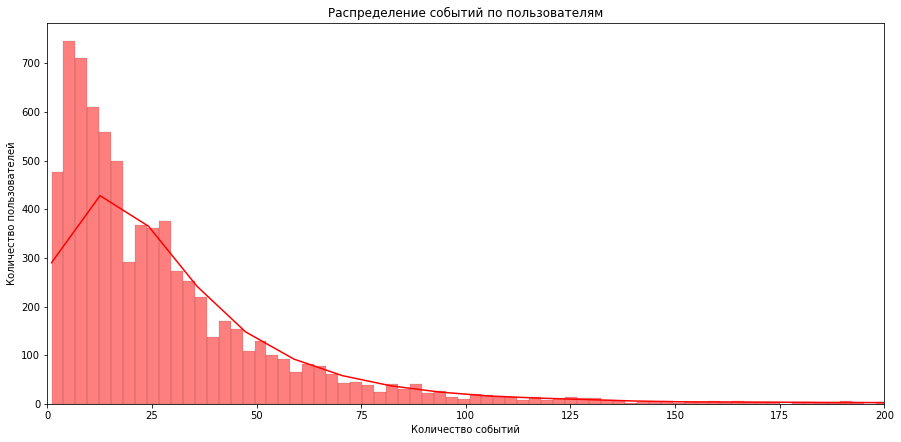

In [19]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df.groupby('user_id')[['event']].count(), x='event', kde=True,color = 'red')
plt.title('Распределение событий по пользователям')
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')
plt.xlim(0,200)
plt.show()

In [20]:
df.groupby('user_id')[['event']].count().describe()

,event
count,7551.000000
mean,32.275593
std,65.154219
min,1.000000
25%,9.000000
50%,20.000000
75%,37.000000
max,2307.000000


### Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период?Данными за какой период времени вы располагаете на самом деле?

In [21]:
# максимальная и минимальная дата
print('Данные за период:',df['event_time'].min(),'-',df['event_time'].max())

Данные за период: 2019-07-25 04:43:36 - 2019-08-07 21:15:17


Максимальная и минимальная дата

In [22]:
min_date = df['event_time'].min()
max_date = df['event_time'].max()
print('Минимальная дата:',min_date)
print('Максимальная дата:',max_date)

Минимальная дата: 2019-07-25 04:43:36
Максимальная дата: 2019-08-07 21:15:17


Посмотрим на период,за который предоставлены данные

In [23]:
diff = max_date - min_date

print('Данные предтавлены за период от %s до %s, разница в %s.' % (min_date,max_date,diff))

Данные предтавлены за период от 2019-07-25 04:43:36 до 2019-08-07 21:15:17, разница в 13 days 16:31:41.


Видно, что у нас имеются данные почти за 2 недели.

Посмотрим, как распределились события по дате и времени и построим гистограмму 

In [24]:
df1 = df.pivot_table(index='date', values='event', aggfunc='count').reset_index(drop=True) # Создаем таблицу с группировкой данных по года
df1

,event
0,9
1,31
2,55
3,105
4,184
5,412
6,2030
7,36141
8,35554
9,33282


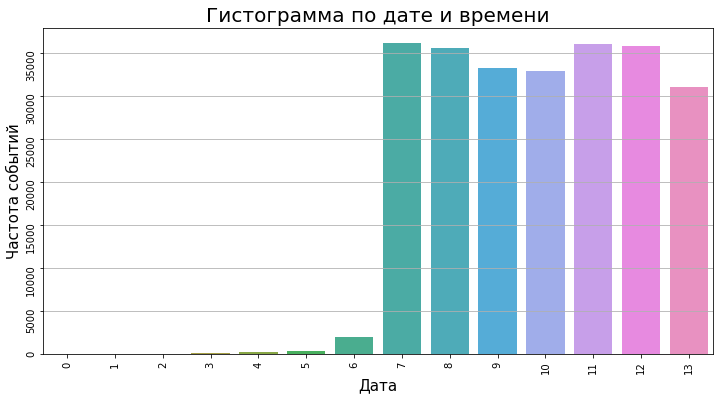

In [25]:
plt.figure(figsize=[12,6])
ax=sns.barplot(data=df1, x=df1.index, y="event")
ax.axes.set_title('Гистограмма по дате и времени',fontsize=20)
ax.set_xlabel('Дата',fontsize=15)
ax.set_ylabel('Частота событий',fontsize=15)
ax.tick_params(labelsize=10,rotation = 90)
ax.yaxis.grid(True)

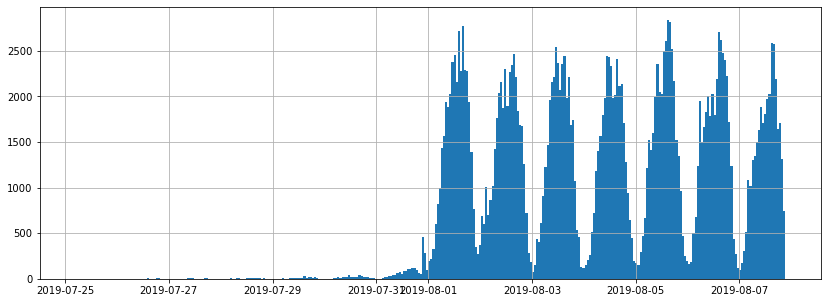

In [26]:
# код ревьюера
df['event_time'].hist(bins=14*24, figsize=(14, 5));

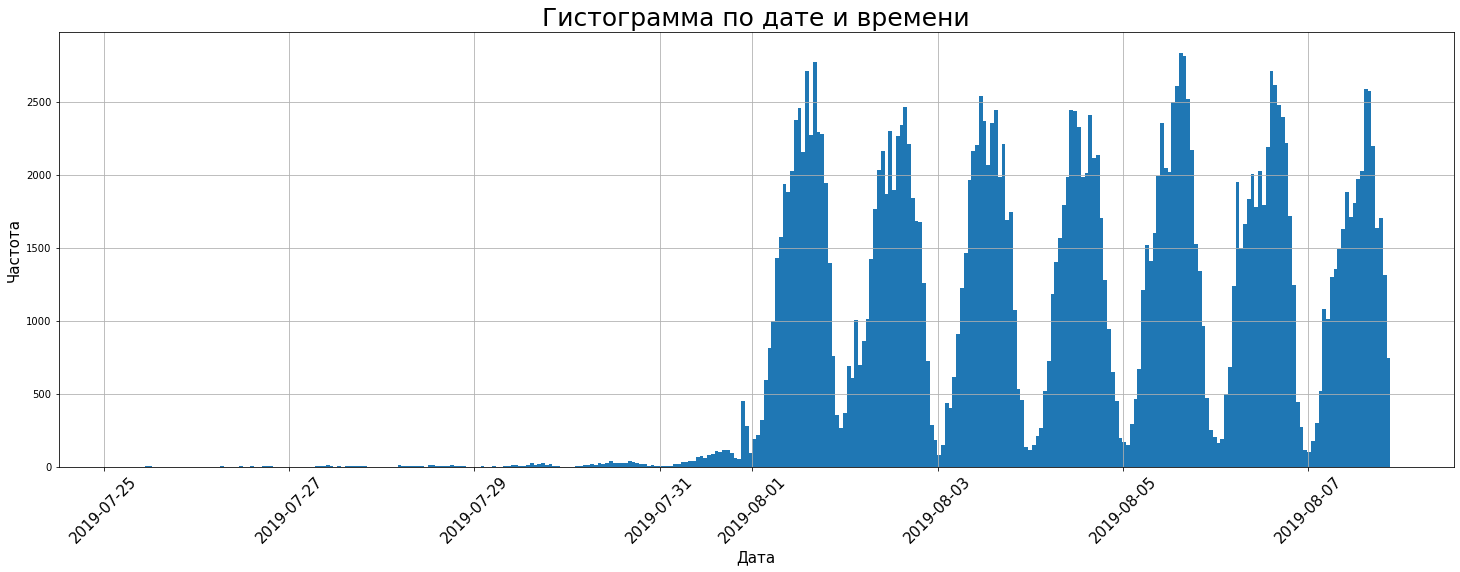

In [27]:
df['event_time'].hist(bins=14*24,figsize=(25,8))
plt.title('Гистограмма по дате и времени',fontsize=25)
plt.ylabel("Частота",fontsize=15)
plt.xlabel("Дата",fontsize=15)
plt.xticks(rotation=45,fontsize=15)
plt.show()

Видно, что резкий скачок числа событий произошел в дату 01.08.2019.И в дальнейшем наступил некая стабилизация.Можно также посмотреть как распределились события по времени по каждому событию.Это хорошо видно на линейчатом графике.

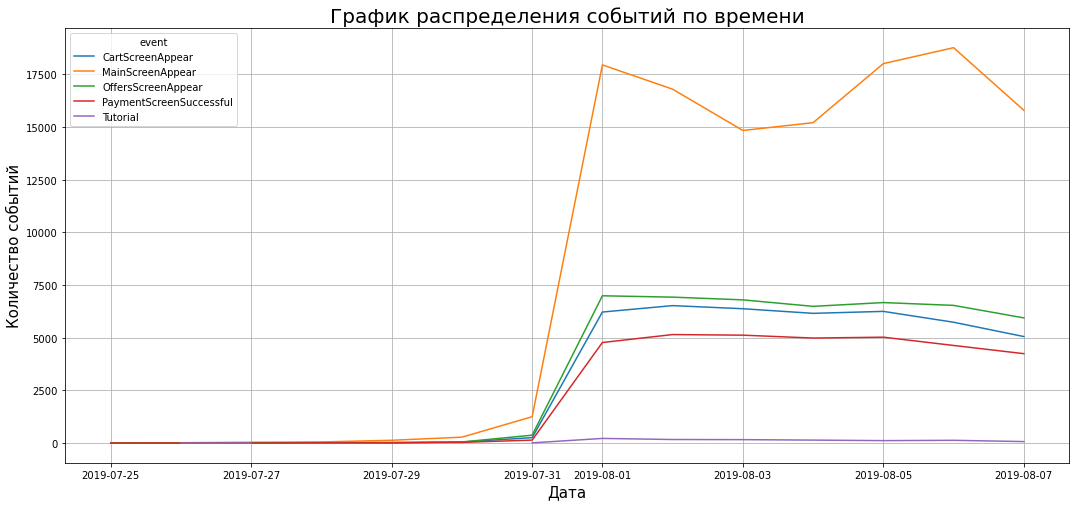

In [28]:
df.pivot_table(
    index='date',  
    columns='event',  
    values='user_id', 
    aggfunc='count',  
).plot(figsize=(18,8), grid=True)

plt.title('График распределения событий по времени',fontsize=20)
plt.xlabel('Дата',fontsize=15)
plt.ylabel('Количество событий',fontsize=15)
plt.show()

Видим аналогичную картину.Эксперимент проходил 2 недели, однако выяснилось, что до данные становятся полными после 01.08.2019.Данные до этой даты стоит считать устаревшими и удалить.

In [29]:

df_cl = df.query('date >= datetime(2019, 8, 1).date()')

df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240887 entries, 2826 to 243712
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       240887 non-null  object        
 1   user_id     240887 non-null  int64         
 2   event_time  240887 non-null  datetime64[ns]
 3   group       240887 non-null  int64         
 4   date        240887 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.0+ MB


Посмотрим, за какой период теперь мы располагаем данными

In [30]:
min_date = df_cl['event_time'].min()
max_date = df_cl['event_time'].max()
print('Минимальная дата:',min_date)
print('Максимальная дата:',max_date)
diff = max_date - min_date

print('Данные предтавлены за период от %s до %s, разница в %s.' % (min_date,max_date,diff))

Минимальная дата: 2019-08-01 00:07:28
Максимальная дата: 2019-08-07 21:15:17
Данные предтавлены за период от 2019-08-01 00:07:28 до 2019-08-07 21:15:17, разница в 6 days 21:07:49.


Терерь у нас данные за неделю.

### Много ли событий и пользователей вы потеряли, отбросив старые данные?

Посмотрим на относительные потери событий и пользователей при удалении старых данных.

In [31]:
print('Относительные потери пользователей при фильтрации:','{0:.2%}'.format((len(df['user_id'].unique())-len(df_cl['user_id'].unique()))/
                                                                            (len(df['user_id'].unique()))))

Относительные потери пользователей при фильтрации: 0.23%


In [32]:
print('Относительные потери событий при фильтрации:','{0:.2%}'.format((len(df['event'])-len(df_cl['event']))/
                                                                      (len(df['event']))))

Относительные потери событий при фильтрации: 1.16%


In [33]:
print('Абсолютные  потери пользователей при фильтрации:',len(df['user_id'].unique())-len(df_cl['user_id'].unique()))

Абсолютные  потери пользователей при фильтрации: 17


In [34]:
print('Абсолютные потери событий при фильтрации:',len(df['event'])-len(df_cl['event']))

Абсолютные потери событий при фильтрации: 2826



### Проверьте, что у вас есть пользователи из всех трёх экспериментальных груп

Проверим,нет ли таких пользоавтелей, которые попали более чем в  одну группу

In [35]:
len(df_cl.groupby('user_id')['group'].nunique().reset_index().query('group > 1'))

0

In [36]:
df_cl.groupby('group')['user_id'].nunique().reset_index()

,group,user_id
0,246,2484
1,247,2513
2,248,2537


Таким образом видно,что пользователи есть во всех трех группах, и распределены они достаточно равномерно.Пользователей,которые бы попали больше,чем в одну группу не обнаружено. 

**ВЫВОД по Шагу 3**

На этапе изучение и проверки данных выявлено следующее:

- Всего событий в логе - 243713.Уникальных событий 5,и их названия тоже уникальны.Всего в логе 7551 уникальный пользователь.

- Среднее чисо событий на одного пользователя -32.Однако построив график распределения событий по числу пользователей  мы выяснили,что выборук  лучше характеризует  медианное значение событий на одного пользователя - 20! 

- Данные педставленны за период: **с 2019-07-25 04:43:36 по 2019-08-07 21:15:17** .То есть практически за  2 недели( 14 дней)

- С целью посмотреть,как распределились события по дате и времени и построена гистограмма и График распределения событий по времени.Выяснено, что до данные становятся полными после 01.08.2019.Данные до этой даты стоит считать устаревшими и принято решение их удалить.

- Отфильтрованный период -**от 2019-08-01 00:07:28 до 2019-08-07 21:15:17**.То есть приблизительно за 1 неделю(или 7 дней)

-- Относительные потери пользователей при фильтрации составили  0.23%(17)А Относительные потери числа событий - соответственно 1.16%(2826).

- Пользователи  распределены достаточно равномерно по трем группам: в группе `246`- 2484 пользователя и `247` — 2513(это контрольные группы), а в`248`— 2537 пользователей(Это экспериментальная группа).Пользователей,которые бы попали больше,чем в одну группу не обнаружено.

## Шаг 4. Изучение воронки событий

### Какие события есть в логах, как часто они встречаются. Сортировка событий по частоте.



In [37]:
df_cl['event'].unique()

array(['Tutorial', 'MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful'], dtype=object)

`MainScreenAppear` - просмотр главной страницы

`OffersScreenAppear` -  просмотр страницы  товара

`CartScreenAppear` - просмотр корзинаы

`PaymentScreenSuccessful`- переход на страницу успешной оплаты

`Tutorial`- просмотр руководства пользователя


In [38]:
df2 = df_cl.pivot_table(index='event', values='user_id', aggfunc='count').sort_values(by='user_id',ascending = False)
df2

,user_id
event,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


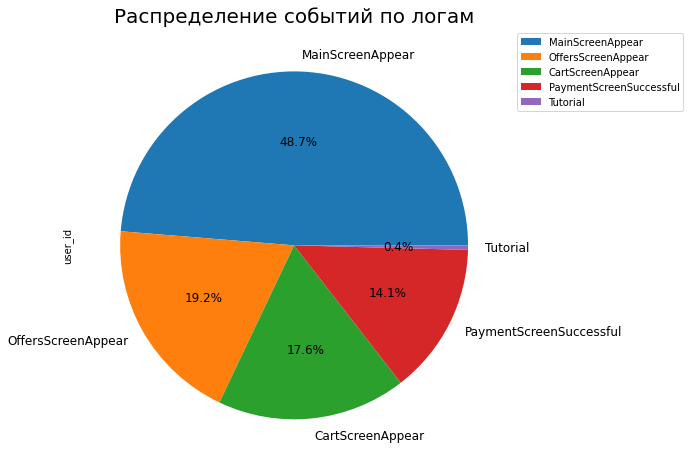

In [39]:
df2.plot(kind='pie',figsize=(8,8), y= 'user_id',autopct='%1.1f%%',fontsize = 12)

plt.title("Распределение событий по логам",fontsize= 20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

**Вывод** 

Итак мы видим  5 событий:  просмотр главной страницы(встречается в 48.7%),просмотр страницы товара(19.2%),просмотр корзины(17.6%),переход на страницу успешной оплаты(14.1%) и просмотр руководства пользователя(всего 0.4%).Первые 4 собыьия логично вытекают одно из другого. А последнее событие- просмотр  инструкций,этап не обязательный.Туда пользователь обращается редко, по мере необходимости.Видимо в данном приложении все и так достаточно понятно!

### Расчет числа пользователей совершающих каждое из этих событий.Сортировка событий по числу пользователей.Расчет доли пользователей, которые хоть раз совершали событие.

In [40]:
df3 = (df_cl.groupby('event').agg({'user_id': 'nunique'}).
          rename(columns={'user_id' : 'users'}).
          sort_values(by='users', ascending=False)).reset_index()
df3['%users'] = (df3['users'] / df_cl['user_id'].nunique() * 100).round(2)
df3

,event,users,%users
0,MainScreenAppear,7419,98.47
1,OffersScreenAppear,4593,60.96
2,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97
4,Tutorial,840,11.15


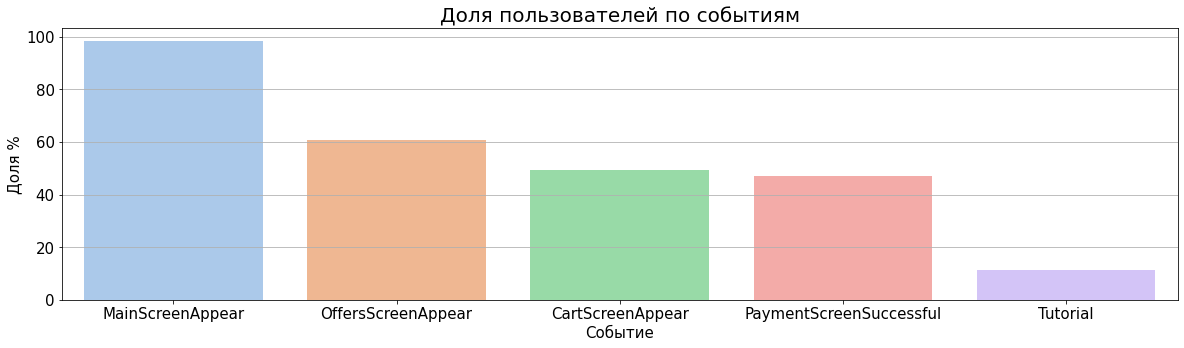

In [41]:
plt.figure (figsize=(20,5))

ax = sns.barplot(x='event',y='%users',data=df3,
                 palette='pastel')

ax.axes.set_title('Доля пользователей по событиям',fontsize=20)
ax.set_xlabel('Событие',fontsize=15)
ax.set_ylabel('Доля %',fontsize=15)
ax.tick_params(labelsize=15)
ax.yaxis.grid(True);

**Вывод** 

- 98.47 % всех пользователей просматривают главную страницу приложения(видно,что какя-то часть все- таки минует этот этап)

- 60.96 % всех пользователей просматривают  страницу товара

- 49.56 % попадают на страницу корзины 

- 46.97% перешли  на страницу успешной оплаты

- 11.15% просмотривали  руководство пользователя

### Предположения о том, в каком порядке происходят события.
Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.




Итак отметим :
    - В последовательнужю  цепочку выстраиваются следующие 4 события:
       **Посещение главной страницы приложения  → → →просмотр страницы товара  → → → попадание в корзину  → → → оплата товара**
     Пятое  событие - просмотр руководства пользователя в  эту цепочку не входит и в рачет пользовательской воронки это собыьие учитывать не нужно!      

исключим  из воронки событие Tutorial

In [42]:

df3 = df3.query('event!="Tutorial"').sort_values(by='users', ascending=False)
df3

,event,users,%users
0,MainScreenAppear,7419,98.47
1,OffersScreenAppear,4593,60.96
2,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97



### Расчет по воронке событий , какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем).  
 Для последовательности событий A → B → C считаем отношение числа пользователей с событием B к количеству пользователей с  событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.


Построим воронку событий с использованием библиотеки `Plotly`.Она позволяет наглядно представить нужные данные.

In [43]:
fig = go.Figure()

fig = go.Figure(go.Funnel(x = df3['users'],
       y = ['просматривают главную страницу','просмотр страницы товара','попадание в корзину','оплата товара'],
                          textinfo = "value+percent initial+percent previous",marker = {"color":'lightcoral'}))

fig.update_layout(title="Воронка событий ")  
fig.show();

In [44]:
df3['%prev'] = df3['users']/df3['users'].shift(1)
df3['%prev'] = (df3['%prev'] * 100).round(1)
df3

,event,users,%users,%prev
0,MainScreenAppear,7419,98.47,NaN
1,OffersScreenAppear,4593,60.96,61.9
2,CartScreenAppear,3734,49.56,81.3
3,PaymentScreenSuccessful,3539,46.97,94.8


**ВЫВОД**
При анализе построенной воронки видно:

1 этап (главная страница) это  100% пользователей

2 этап(страница тоаара)- туда попадает  61.9% от предыдщего шага(потери 38.1%)

3 этап(корзина)- туда попадает 81.3% от предыдущего шага(потери 18.7%)

4 этап(страница оплаты)- туда попадает 94.8% от предыдущего шага(потери 5.2%)



### На каком шаге теряется больше всего пользователей?

- Больше всего пользователей теряется на главной странице(`MainScreenAppear`)- это 38.1%.
  
 Это с одной стороны много а с другой- нормально.Пользователь заходит в приложение и знакомится с продуктом.Если у его возникает интерес,то идет дальше.Может быть для тех,кто не пошел дальше главная страница оказалась непривлекательной или кнопка перехода на следующий этап мало заметна или неудобна.Нынешний пользователь  избалован и ему не нравитсяв чем-то долго разбираться.С целью увеличения конверсии на этом шаге можно предложить обратить внимание на дизайн и функциональность главной страницы.
 
  
- Далее мы наблюдаем  повышение процента перехода пользователей из одно шага в другой.И потери припереходе к корзине составляют 18.7%, а к переходу на экран оплаты - 5.2%. Видно, что дальше пользователь чувствует себя увереннее. 
Однако стоит заметить,что не все , кто попал на страницу оплаты завершают этот этап.Может покупатель в последний момент передумал или у него возникли какие-то технические трудности при оплате или есть неудобства при заполнении платежных данных?На это тоже стоит обратить внимание.




### Какая доля пользователей доходит от первого события до оплаты?

Добавим для наглядности столбец,где отражается процент перехода с первого этапа на каждый из следующих

In [45]:
df3['%conv'] = df3['users']/df3.loc[0,'users']
df3['%conv'] = (df3['%conv'] * 100).round(1)
df3

,event,users,%users,%prev,%conv
0,MainScreenAppear,7419,98.47,NaN,100.0
1,OffersScreenAppear,4593,60.96,61.9,61.9
2,CartScreenAppear,3734,49.56,81.3,50.3
3,PaymentScreenSuccessful,3539,46.97,94.8,47.7


Видно, что 47,7% пользователей доходит до страницы успешной оплаты (`PaymentScreenSuccessful`) относительно первого события-просмотра главной страницы(`MainScreenAppear`). Очень хороший результат - почти половина пользователей!

**ВЫВОД по Шагу 4**

На этапе изучения воронки событий выявлено следующее:


- Выявлено  5 событий: `MainScreenAppear`- просмотр главной страницы(встречается в 48.7%),`OffersScreenAppear` - просмотр страницы товара(19.2%),`CartScreenAppear`- просмотр корзины(17.6%)- `PaymentScreenSuccessful`- переход на страницу успешной оплаты(14.1%) и `Tutorial`- просмотр руководства пользователя(всего 0.4%).

- Из всего числа уникальных пользователей:

  - 98.47 % всех пользователей просматривают главную страницу приложения(видно,что какя-то часть все- таки минует этот этап)

  - 60.96 % всех пользователей просматривают  страницу товара

  - 49.56 % попадают на страницу корзины 

  - 46.97% перешли  на страницу успешной оплаты

  - 11.15% просмотривали  руководство пользователя


-  ОтмеченоБ,что в последовательнужю  цепочку выстраиваются следующие 4 события:
     
 **Посещение главной страницы приложения  → → →просмотр страницы товара  → → → попадание в корзину  → → → оплата товара**
Пятое  событие - просмотр руководства пользователя в  эту цепочку не входит и в рачет пользовательской воронки это собыьие      учитывать не нужно! 

- Построен график воронки событий с использованием библиотеки `Plotly`,что наглядно позволило увидеть, что:

1 этап (главная страница) это  100% пользователей

2 этап(страница тоаара)- туда попадает  61.9% от предыдщего шага(потери 38.1%)

3 этап(корзина)- туда попадает 81.3% от предыдущего шага(потери 18.7%)

4 этап(страница оплаты)- туда попадает 94.8% от предыдущего шага(потери 5.2%)

- Касательно потерь пользователей от этапа к этпу замечено:

   - Больше всего пользователей теряется на главной странице(`MainScreenAppear`)- это 38.1%.Это с одной стороны много а сдругой-      нормально.Пользователь заходит в приложение и знакомится с продуктом.Если унего возникает интерес,то идет дальше.Может быть      для тех,кто не пошел дальше главная страница оказалась непривлекательной или кнопка перехода на следующий этап мало заметна      или неудобна.Нынешний пользователь  избалован и ему не нравитсяв чем-то долго разбираться.С целью увеличения конверсии на        этом шаге можно предложить обратить внимание на дизайн и функциональность главной страницы. 
   - Далее мы наблюдаем  повышение процента перехода пользователей из одно шага в другой.И потери припереходе к   корзинсоставляют 18.7%, а к переходу на экран оплаты - 5.2%. Видно, что дальше пользователь чувствует себя увереннее. Однако стоит заметить,что не все , кто попал на страницу оплаты завершают этот этап.Может покупатель в последний момент передумал или у него возникли какие-то технические трудности при оплате или есть неудобства при заполнении платежных данных?На это тоже стоит    обратить внимание.
   
- Видно, что 47,7% пользователей доходит до страницы успешной оплаты (`PaymentScreenSuccessful`) относительно первого события-просмотра главной страницы(`MainScreenAppear`). Очень хороший результат - почти половина пользователей!

## Шаг 5. Изучене результатов эксперимента


Для анализа берем данные за актуальный период,собранные в `df_cl`

In [46]:
df_cl.head()

,event,user_id,event_time,group,date
2826,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2827,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2828,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2829,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2830,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


### Сколько пользователей в каждой экспериментальной группе?

In [47]:
df4= df_cl.groupby('group')['user_id'].nunique().reset_index()
df4

,group,user_id
0,246,2484
1,247,2513
2,248,2537


Пользователи распределены достаточно равномерно по трем группам: в группе `246`- 2484 пользователя и `247` — 2513(это контрольные группы), а в `248`— 2537 пользователей(Это экспериментальная группа)

### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.


**Критерии успешного A/A-теста:** 
- Количество пользователей в различных группах различается не более, чем на 1%;
- Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
- Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;
- Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

Посмотрим разницу в количестве пользователей по группам(в %) между контрольными группами, а заодно сравним с колличеством в экспериментальной.

In [48]:
#разница в количестве пользователей
for i in range(0, 3):
    group_list = [246, 247, 248, 246]
    print(f'Разница между группой {group_list[i]} и {group_list[i+1]} составляет {1 - df_cl.query("group == @group_list[@i]")["user_id"].nunique() / df_cl.query("group == @group_list[@i+1]")["user_id"].nunique():.2%}')

Разница между группой 246 и 247 составляет 1.15%
Разница между группой 247 и 248 составляет 0.95%
Разница между группой 248 и 246 составляет -2.13%


Рвзница между контрольными группами `246` и  `247` составила 1.15%  .Это чуть больше 1%, что нечущественно.

Для иллюстрации распределения пользователей по шагам для разных групп построим Воронку событий в разрезе групп

In [49]:
#построим воронку

list_n = ['просматривают главную страницу','просмотр страницы товара','попадание в корзину','оплата товара']
steps = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 
       'PaymentScreenSuccessful']

df_funnel = df_cl.groupby(['group', 'event'], as_index=False).agg({'user_id': 'nunique'}).query('event != "Tutorial"')

color = ['lightblue','fuchsia','lightcoral']
fig = go.Figure()

fig.add_trace(go.Funnel(name = '246',

    y = list_n,
    x = df_funnel.query('group == 246').set_index('event').loc[steps]['user_id'],
    textinfo = "value+percent previous", marker = {"color":'blue'}))

fig.add_trace(go.Funnel(name = '247',

    y = list_n,
    x = df_funnel.query('group == 247').set_index('event').loc[steps]['user_id'],
    textinfo = "value+percent previous", marker = {"color":'fuchsia'}))

fig.add_trace(go.Funnel(name = '248',

    y = list_n,
    x = df_funnel.query('group == 248').set_index('event').loc[steps]['user_id'],
    textinfo = "value+percent previous",marker = {"color":'green'}))


fig.update_layout(title={'x': 0.5, 'text': 'Воронка из шага в шаг в разрезе групп'})
fig.show()

In [50]:
test = (df_cl[df_cl['event']!='Tutorial'].pivot_table(
    index='event', 
    columns='group', 
    values='user_id',
    aggfunc='nunique')
                    .sort_values(246, ascending=False).reset_index())
test

group,event,246,247,248
0,MainScreenAppear,2450,2476,2493
1,OffersScreenAppear,1542,1520,1531
2,CartScreenAppear,1266,1238,1230
3,PaymentScreenSuccessful,1200,1158,1181


Таким образом контрольные группы не имеют значительных различий  по числу пользователей,ранее  мы проводили проверку на предмет пользователей , попавших в несколько групп  и таковых не обнаружили.Проверить, как зафиксированы и отправлены логи, мы не можем - положимся на источник наших данных.О различии ключевых метрик по группам будем судить по результату последующих проверок.

### Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп.(A/A тест) Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?




Самым популяноым событием стоит признать `MainScreenAppear`-просмотр главной страницы

**Сформулируем гипотезу:**

**H0** - статистически значимых различий в поведении пользователей,совершивших событие для сравниваемых групп нет

**H1** - статистически значимые различия в  поведении пользователей,совершивших событие для сравниваемых групп есть

Выберем критический уровень значимости - 0.05.В нашем случае этого будет достаточно.


Для проверки гипотез воспользуемся Z-критерием и применим метод Бонферрони (поправка Бонферрони), так как проводим множественное сравнение. В  случае A/A  теста будет 4 сравнения.А в случае A/A/B теста будет 4х3 = 12 .Итого коэффициент будет n = 16;



Подготовим данные

In [51]:
test = df_cl[df_cl['event']!='Tutorial'].pivot_table(index='event', columns='group', values='user_id', aggfunc='nunique').reset_index().sort_values(246, ascending=False).reset_index(drop=True)
test['247+246'] = test[246] + test[247]
test

group,event,246,247,248,247+246
0,MainScreenAppear,2450,2476,2493,4926
1,OffersScreenAppear,1542,1520,1531,3062
2,CartScreenAppear,1266,1238,1230,2504
3,PaymentScreenSuccessful,1200,1158,1181,2358


Создадим функцию для проверки различий в поведении пользователей. 

In [52]:
def func_test(data1,data2, event_name, alpha, n):
     # уровень статистической значимости c поправкой Бонферрони    
    bonferroni_alpha = alpha / n
   
    # число пользователей 
    user_num = np.array([data1['user_id'].nunique(),data2['user_id'].nunique()])
    
    # число пользователей, совершивших переданное функции событие
    success = np.array([data1[data1['event'] == event_name]['user_id'].nunique(),data2[data2['event'] == event_name]['user_id'].nunique()])
    
    # пропорции совершения события в группах
    p1 = success[0]/user_num[0] 
    p2 = success[1]/user_num[1]
    
    # пропорция совершения события в комбинированном датасете:
    p_combined = (success[0] + success[1]) / (user_num[0] + user_num[1])
    
    # разница пропорций в датасетах
    difference = p1 - p2 
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference /  np.sqrt(p_combined * (1 - p_combined) * (1/user_num[0] + 1/user_num[1]))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  
    # так как тест двусторонний (либо раличий нет, либо различия есть), то удваиваем результат
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    
    # уровень статистической значимости c поправкой Бонферрони    
    bonferroni_alpha = alpha / n
    
    print('Событие :', event_name)
    
    print('p-value: ', '{0:.3f}'.format(p_value))
    
    if p_value < bonferroni_alpha:
        
        print('Отвергаем нулевую гипотезу: между поведением  пользователей в группах есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными ')

Посмотрим,как поправка Бонферрони повлияла на уровень alpha

In [53]:
alpha = 0.05
n=16
bonferroni_alpha = alpha / n
print(bonferroni_alpha)

0.003125


In [54]:
for event in test['event']:
    func_test(df_cl[df_cl['group']==246],df_cl[df_cl['group']==247], event, 0.05,16)
    print()

Событие : MainScreenAppear
p-value:  0.757
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 

Событие : OffersScreenAppear
p-value:  0.248
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 

Событие : CartScreenAppear
p-value:  0.229
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 

Событие : PaymentScreenSuccessful
p-value:  0.115
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 



**ВЫВОД**
По результатам A/A (группы `246`и`247`)тестирования для всех событий не удалось отвергнуть **H0**.Значения `p-value`(0.115-0.757) значительно превышают уровень значимости с учетом прправки.:Значит статистически значимых различий в долях пользователей,совершивших событие для сравниваемых групп нет. И разбиение в контрольных группах можно считать корректным.

### Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?


Теперь мы будем сравнивать экспериментальную группу `B`(`248`) c двумя контрольными группами A/A(`246` и `247`).

**Сформулируем гипотезу:**

**H0** - Замена шрифта в приложении  не влияет на поведение пользователей

**H1** - Замена шрифта в приложении  влияет на поведение пользователей

Выберем критический уровень значимости - 0.05.В нашем случае этого будет достаточно.


Для проверки гипотез воспользуемся Z-критерием и применим метод Бонферрони (поправка Бонферрони), так как проводим множественное сравнение. В этом случае также n=16.



**Сравнение групп `246` и `248`**

In [55]:
for event in test['event']:
    func_test(df_cl[df_cl['group']==246],df_cl[df_cl['group']==248], event, 0.05,16)
    print()

Событие : MainScreenAppear
p-value:  0.295
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 

Событие : OffersScreenAppear
p-value:  0.208
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 

Событие : CartScreenAppear
p-value:  0.078
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 

Событие : PaymentScreenSuccessful
p-value:  0.212
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 



**Сравнение групп `247` и `248`**

In [56]:
for event in test['event']:
    func_test(df_cl[df_cl['group'] ==247],df_cl[df_cl['group']==248], event, 0.05,16)
    print()

Событие : MainScreenAppear
p-value:  0.459
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 

Событие : OffersScreenAppear
p-value:  0.920
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 

Событие : CartScreenAppear
p-value:  0.579
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 

Событие : PaymentScreenSuccessful
p-value:  0.737
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 



**Сравнение объединенной группы `246+247` и `248`**

In [57]:
for event in test['event']:
    func_test(df_cl[df_cl['group']!=248],df_cl[df_cl['group']==248], event, 0.05,16)
    print()

Событие : MainScreenAppear
p-value:  0.294
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 

Событие : OffersScreenAppear
p-value:  0.434
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 

Событие : CartScreenAppear
p-value:  0.182
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 

Событие : PaymentScreenSuccessful
p-value:  0.600
Не получилось отвергнуть нулевую гипотезу, нет оснований считать поведением  пользоаптелей  разными 



**ВЫВОД** 
По результатам A/A/B тестирования (сравнивались контрольные группы `246`и`247` и экспериментальная -`248` )для всех событий не удалось отвергнуть `H0`.Значит статистически значимых различий в долях пользователей,совершивших событие для сравниваемых групп нет. И значит изменение шрифта в приложении не оказало статистически значимого влияния на поведение пользователей.При сравнении экспериментальной группы с объединенной контрольной группой можно сделать таие же выводы.


### Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

При проверке статистических гипотез выбран уровень значимости `alpha = 0.05`. Для проверки гипотез использовался Z-критерий и применили метод Бонферрони (поправка Бонферрони), так как проводилось множественное сравнение.И приняли n = 16,в итоге  `bonferroni_alpha =0.003125`.Было сделано 16 проверок гипотез.
В  результате проверок полученное значение`p-value` для всех видов проверок превысило это значение.Стоит заметить,что даже при уровне альфа 0.05 все р-значения были бы значительно выше уровня значимости и ложнопрложительных результатов быть не может.Поэтому,можно было и обойтись без использования поправки.


**ВЫВОД по Шагу 5**

 - Для  изучения результатов эксперимента были использоанны данные за актуальный период,собранные в `df_cl`.Выяснено,что пользователи распределены достаточно равномерно по трем группам: в группе `246`- 2484 пользователя и `247` — 2513(это контрольные группы), а в `248`— 2537 пользователей(Это экспериментальная группа)
 - Рвзница между контрольными группами 246 и 247 составила 1.15% .Это чуть больше 1%, что несущественно.
Для иллюстрации распределения пользователей по шагам для разных событий в разрезе групп построен графмик воронки с  использованием библиотеки plotly.

-  Самым популяноым событием стоит признать MainScreenAppear-просмотр главной страницы

- **Для контрольных групп (A/A тест)** Сформулированы и проверены гипртезы:

**H0** - статистически значимых различий в поведении пользователей,совершивших событие для сравниваемых групп нет

**H1** - статистически значимые различия в  поведении пользователей,совершивших событие для сравниваемых групп есть

Выберан критический уровень значимости - 0.05.В нашем случае этого будет достаточно.
Для проверки гипотез воспользовались Z-критерием и примннили метод Бонферрони (поправка Бонферрони), так как проводим множественное сравнение. В случае A/A теста будет 4 сравнения.А в случае A/A/B теста будет 4х3 = 12 .Итого коэффициент n = 16;

По результатам A/A (группы `246`и`247`)тестирования для всех событий не удалось отвергнуть **H0**.Значения `p-value`(0.115-0.757) значительно превышают уровень значимости с учетом прправки.:Значит статистически значимых различий в поведении пользователей,совершивших событие для сравниваемых групп нет. И разбиение в контрольных группах можно считать корректным.

**Для сравнения экспериментальной группу `B`(`248`) c двумя контрольными группами A/A(`246` и `247`)**.
сформулированны

**H0** - Замена шрифта в приложении  не влияет на поведение пользователей

**H1** - Замена шрифта в приложении  влияет на поведение пользователей
Критерии для проверки выбраны аналогично.

По результатам A/A/B тестирования (сравнивались контрольные группы `246`и`247` и экспериментальная -`248` )для всех событий не удалось отвергнуть **H0**.Значит статистически значимых различий в долях пользователей,совершивших событие для сравниваемых групп нет. И значит изменение шрифта в приложении не оказало статистически значимого влияния на поведение пользователей.При сравнении экспериментальной группы с объединенной контрольной группой можно сделать таие же выводы.



## ОБЩИЙ ВЫВОД

**Цель проекта**

Определить,как ведут себя пользователи вашего мобильного приложения.Изучить воронку продаж и ухнать как  пользователи доходят до покупки. После этого исследовать результаты A/A/B-эксперимента.Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми.Нужно выяснить, какой шрифт лучше.

**На этапе Знакомства и подготовки данных отмечено:**

- Нам предоставлены данные записей в логах мобильного приложения по продаже продуктов питания.
- Каждая запись в логе — это действие пользователя, или событие.Датасет имеет **244126** таких записей в **4** колонках: название события, уникальный идентификатор пользователя,время события и номер группы пльзователя,куда он попал в результе A/A/B теста.
- Пропусков не обнаружено.Но есть 413 дудликатов.Удалены явные дубликаты.
- В колонке с временем события представлено типом `int64` и выраженно в секундах.Заменен тип данных в столбце с датой на `datetime`в формате дата и время
- Названия столбцов приведены к общепринятому и боллее удобному виду.
- Добавлен  отдельный столбец дат



**На этапе изучение и проверки данных выявлено следующее:**

- Уникальных событий 5,и их названия тоже уникальны.Всего в логе 7551 уникальный пользователь.

- Данные педставленны за период: **с 2019-07-25 04:43:36 по 2019-08-07 21:15:17** .То есть практически за  2 недели( 14 дней)

- Среднее чисо событий на одного пользователя -32.Однако построив график распределения событий по числу пользователей  мы выяснили,что выборук  лучше характеризует  медианное значение событий на одного пользователя - 20! 

- С целью посмотреть,как распределились события по дате и времени и построена гистограмма и График распределения событий по времени.Выяснено, что до данные становятся полными после 01.08.2019.Данные до этой даты стоит считать устаревшими и принято решение их удалить.

- Отфильтрованный период -**от 2019-08-01 00:07:28 до 2019-08-07 21:15:17**.То есть приблизительно за 1 неделю(или 7 дней)

- Относительные потери пользователей при фильтрации составили  0.23%(17)А Относительные потери числа событий - соответственно 1.16%(2826).Это незначительные потери.




**На этапе изучения воронки событий:**

- Выявлено  5 событий: `MainScreenAppear`- просмотр главной страницы(встречается в 48.7%),`OffersScreenAppear` - просмотр страницы товара(19.2%),`CartScreenAppear`- просмотр корзины(17.6%)- `PaymentScreenSuccessful`- переход на страницу успешной оплаты(14.1%) и `Tutorial`- просмотр руководства пользователя(всего 0.4%).
- Из всего числа уникальных пользователей:

  - 98.47 % всех пользователей просматривают главную страницу приложения(видно,что какя-то часть все- таки минует этот этап)

  - 60.96 % всех пользователей просматривают  страницу товара

  - 49.56 % попадают на страницу корзины 

  - 46.97% перешли  на страницу успешной оплаты

  - 11.15% просмотривали  руководство пользователя
- ОтмеченоБ,что в последовательнужю  цепочку выстраиваются следующие 4 события:
     
 **Посещение главной страницы приложения  → → →просмотр страницы товара  → → → попадание в корзину  → → → оплата товара**
Пятое  событие - просмотр руководства пользователя в  эту цепочку не входит и в рачет пользовательской воронки это собыьие      учитывать не нужно! 

- Построен график воронки событий с использованием библиотеки `Plotly`,что наглядно позволило увидеть, что:

1 этап (главная страница) это  100% пользователей

2 этап(страница тоаара)- туда попадает  61.9% от предыдщего шага(потери 38.1%)

3 этап(корзина)- туда попадает 81.3% от предыдущего шага(потери 18.7%)

4 этап(страница оплаты)- туда попадает 94.8% от предыдущего шага(потери 5.2%)

- **Касательно потерь пользователей можно сделать такие выводы:**

     - Больше всего пользователей теряется на главной странице(`MainScreenAppear`)- это 38.1%.Это с одной стороны много а сдругой-   нормально.Пользователь заходит в приложение и знакомится с продуктом.Если унего возникает интерес,то идет дальше.Может быть для тех,кто не пошел дальше главная страница оказалась непривлекательной или кнопка перехода на следующий этап мало заметна или неудобна.Нынешний пользователь  избалован и ему не нравитсяв чем-то долго разбираться.С целью увеличения конверсии на этом шаге можно предложить обратить внимание на дизайн и функциональность главной страницы. 
     - Далее мы наблюдаем  повышение процента перехода пользователей из одно шага в другой.И потери припереходе к  корзине составляют 18.7%, а к переходу на экран оплаты - 5.2%. Видно, что дальше пользователь чувствует себя увереннее. Однако стоит заметить,что не все , кто попал на страницу оплаты завершают этот этап.Может покупатель в последний момент передумал или у него возникли какие-то технические трудности при оплате или есть неудобства при заполнении платежных данных?На это тоже стоит    обратить внимание.
   
- Видно, что 47,7% пользователей доходит до страницы успешной оплаты (`PaymentScreenSuccessful`) относительно первого события-просмотра главной страницы(`MainScreenAppear`). Очень хороший результат - почти половина пользователей!


**Изучение результатов эксперимента**

 - Для  изучения результатов эксперимента были использоанны данные за актуальный период,собранные в `df_cl`.Выяснено,что пользователи распределены достаточно равномерно по трем группам: в группе `246`- 2484 пользователя и `247` — 2513(это контрольные группы), а в `248`— 2537 пользователей(Это экспериментальная группа)
 - Рвзница между контрольными группами 246 и 247 составила 1.15% .Это чуть больше 1%, что несущественно.
Для иллюстрации распределения пользователей по шагам для разных событий в разрезе групп построен графмик воронки с  использованием библиотеки plotly.
-  Самым популяноым событием стоит признать MainScreenAppear-просмотр главной страницы

- **Для контрольных групп (A/A тест)** Сформулированы и проверены гипртезы:

**H0** - статистически значимых различий в поведении пользователей,совершивших событие для сравниваемых групп нет

**H1** - статистически значимые различия в  поведении пользователей,совершивших событие для сравниваемых групп есть

Выберан критический уровень значимости - 0.05.В нашем случае этого будет достаточно.
Для проверки гипотез воспользовались Z-критерием и примннили метод Бонферрони (поправка Бонферрони), так как проводим множественное сравнение. В случае A/A теста будет 4 сравнения.А в случае A/A/B теста будет 4х3 = 12 .Итого коэффициент n = 16;

По результатам A/A (группы `246`и`247`)тестирования для всех событий не удалось отвергнуть **H0**.Значения `p-value`(0.115-0.757) значительно превышают уровень значимости с учетом прправки.Значит статистически значимых различий в поведении пользователей,совершивших событие для сравниваемых групп нет. **Разбиение в контрольных группах можно считать корректным.**

**Для сравнения экспериментальной группу `B`(`248`) c двумя контрольными группами A/A(`246` и `247`)**.
сформулированны

**H0** - Замена шрифта в приложении  не влияет на поведение пользователей

**H1** - Замена шрифта в приложении  влияет на поведение пользователей
Критерии для проверки выбраны аналогично.

По результатам A/A/B тестирования (сравнивались контрольные группы `246`и`247` и экспериментальная -`248` )для всех событий не удалось отвергнуть **H0**.Значит статистически значимых различий в долях пользователей,совершивших событие для сравниваемых групп нет. И значит изменение шрифта в приложении не оказало статистически значимого влияния на поведение пользователей.При сравнении экспериментальной группы с объединенной контрольной группой можно сделать таие же выводы.


**Рекомендации**

-  Как было отмечено,большинство пользователей теряется на главной странице(`MainScreenAppear`)- это 38.1%.Может быть для тех,кто не пошел дальше главная страница оказалась непривлекательной или кнопка перехода на следующий этап мало заметна или неудобна.Мможно предложить обратить внимание на дизайн и функциональность главной страницы. 
-  Стоит заметить,что не все , кто попал на страницу оплаты завершают этот этап.(тут теряется 5.2%)Может покупатель в последний момент передумал или у него возникли какие-то технические трудности при оплате или есть неудобства при заполнении платежных данных? На это тоже стоит обратить внимание и разобраться с проблемой.
- Тестирование по шрифтам можно считать успешным - опасения менеджеров,что изменения могут быть негативно восприняты пользователями- не оправдались.Однако вссе же можно порекомендовать повторить тестирование по шрифтам(если позволяют финансы) и провести его в течение более длительношо периода, чтобы убедиться, что различий по конверсии в разных группах действительно нет и что текущий результат не случаен.
  